In [1]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# downloading simulation results:
# see ../simulations

N = 1e6
s = 1e-2

points = {}
for regime in ['r_anteps=1e-2']:
    
    points[regime] = {}
    points[regime]['fs'] = np.load('../simulations/out/%s_fstars.npy' % regime)
    points[regime]['rs'] = np.load('../simulations/out/%s_rs.npy' % regime)
    points[regime]['nums'] = np.load('../simulations/out/%s_numers.npy' % regime)
    points[regime]['denoms'] = np.load('../simulations/out/%s_denoms.npy' % regime)
    

In [5]:
# strong selection result
# see appendix c in the paper

def lambda_bar(rho, gamma_a, gamma_b, gamma_ab):
    return rho/(rho+gamma_a+gamma_b+gamma_ab) * (1 + 
                                                 gamma_a*(rho+gamma_a)/((rho+gamma_b+gamma_ab)*(rho+gamma_b/2+gamma_ab)) + 
                                                 gamma_b*(rho+gamma_b)/((rho+gamma_a+gamma_ab)*(rho+gamma_a/2+gamma_ab)) +
                                                 4*rho*gamma_a*gamma_b*(rho+gamma_a+gamma_b)*(rho+gamma_a/2+gamma_b/2+gamma_ab)/((rho+gamma_a+gamma_ab)*(rho+gamma_b+gamma_ab)*(rho+gamma_ab)**3))


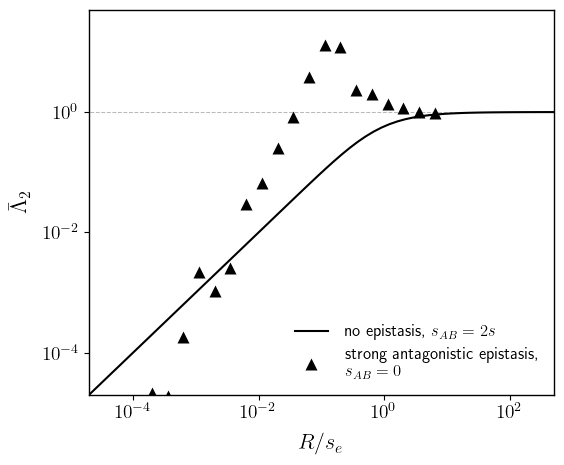

In [6]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(6,5))

cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-4, vmax=-1),cmap=sns.color_palette("crest", as_cmap=True))
grey = '#b9b9b9' 
w = 1.5 # linewidth

# asymptotics
plt.loglog(np.logspace(-6,8,25), np.ones_like(np.logspace(-6,8,25)), '--', color=grey, linewidth=w/2)
#plt.loglog(np.logspace(-6,8,25), [x**2 * 0.5e-6 for x in np.logspace(-6,8,25)], color='#000000', linewidth=w, label="$\\bar{\\Lambda}_2 \propto (NR)^2$")

# theory curve when no epistasis – rescaling since we want R/s_e on the x axis
# if f_0 = 0.1 and N = 1e6, this means s = 1e-2
gamma_a = 1000; gamma_b = 1000; eps = 0; gamma_ab = gamma_a + gamma_b + eps
plt.plot([19 / 30 * x / gamma_ab for x in np.logspace(-4.5, 8, int(1e2))], [lambda_bar(x, gamma_a, gamma_b, gamma_ab) for x in np.logspace(-4.5, 8, int(1e2))], color='black', linewidth=w, zorder=5, 
         label='no epistasis, ' + '$s_{AB}=2s$') # label='numerics'

# adding data
regime = 'r_anteps=1e-2'
for j, f in enumerate(points[regime]['fs'][:-7]):
    if f != 0.01:
        continue
        
    color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
    
    xs = []; ys = []    
    for i, r in enumerate(points[regime]['rs']):
                    
        xs.append(19 /30 * r / s)
        ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
    plt.loglog(xs, ys, '^', markersize=8, markeredgecolor='#00000000', markerfacecolor='#000000', label='strong antagonistic epistasis,\n' + '$s_{AB}=0$')

plt.xticks([1e-4, 1e-2, 1e0, 1e2], 
           ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$'])
plt.yticks([1e-4, 1e-2, 1e0, 1e2], 
           ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$'])
plt.ylim([2e-5, 5e1])
plt.xlim([2e-5, 5e2])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=14)

plt.ylabel("$\\bar{\\Lambda}_2$", fontsize=16, labelpad=8)
plt.xlabel(r"$R / s_e$", fontsize=16, labelpad=8)    

plt.legend(frameon=False, fontsize=12, loc='lower right', bbox_to_anchor=(0.5, 0.0, 0.5, 0.5), handletextpad=1);

plt.savefig('fig4.pdf',dpi=600,bbox_inches='tight') 
